# Non-Linear Regression and Classification w/ SVM and Naive Bayes

Support Vector Machines and Naive Bayers Classifiers are two powerful machine learning techniques used for both regression and classification. Before we get into the details, let's look back at how we've reached this point.

## 1.0 Review

Remember that algorithms are just a 'process to reach an end goal.' In that sense, the entire data analysis process is one large algorithm, containing within itself many sub-functions and sub-algorithms.

## 1.1 Our Algorithm

1. Collect/Import data <br>
2. Clean & Wrangle data <br>
3. Explore the data <br>
4. Normalize data (feature scaling) <br>
5. Apply analysis algo & generate predictions <br>
6. Denormalize data <br>
7. Calculate/quantify error or 'goodness' of model <br>
8. Manually consider ways to improve the model, implement changes, and repeat 1-7 <br>
    - if changes improve the model keep them <br>
    - if changes make the model worse, throw them out
    
## 1.2 Quiz

1. I want to predict customer demand this quarter, which model/algorithm would I use?
2. How would I assess this model's accuracy?
3. I want to predict if financial transactions are fradulent, which model/algorithm would I use?
4. How would I assess this models accuracy?
5. Let's say I am examining health test results, what metrics would I look at to know if I'm predicting correctly?
6. Why do I split data into training and testing?  To avoid overfitting the model to a certain data set.
7. How do I run analysis on non-quantitiative data, such as a customer's gender?  Convert it to dummy columns (panda.get_dummies)


## 2.0 Classification

Last week we looked at classifying between two binary outcomes (Yes or No, 0 or 1), let's continue with looking at how to build on our knowledge of logistic regression and handle more complex cases.

## 2.1 Linear Classification - Logistic Regression

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

logit = LogisticRegression()

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
bike = pd.read_csv('bike_rentals.csv')
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity
0,109,Monday,Spring,0,21,0.500
1,45,Tuesday,Spring,1,25,0.414
2,63,Wednesday,Spring,0,15,0.352
3,105,Thursday,Spring,0,26,0.305
4,20,Friday,Spring,1,10,0.236


In [3]:
# For sake of classification, converting rentals to a discrete 0 and 1 value

# Function which compares input to 100
def over100(x):
    if x>100:
        return 1
    else:
        return 0
    
# Apply our function to every row in 'rentals' column and set new column 'over100' requal to result
bike['over100'] = bike['rentals'].apply(over100)
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity,over100
0,109,Monday,Spring,0,21,0.500,1
1,45,Tuesday,Spring,1,25,0.414,0
2,63,Wednesday,Spring,0,15,0.352,0
3,105,Thursday,Spring,0,26,0.305,1
4,20,Friday,Spring,1,10,0.236,0


In [4]:
# Drop old rentals column since we no longer need it (axis = 1 tells pandas we are dropping a column not a row)
bikes = bike.drop(['rentals'], axis = 1)
bikes.head()

,day_of_week,season,holiday,temp,humidity,over100
0,Monday,Spring,0,21,0.500,1
1,Tuesday,Spring,1,25,0.414,0
2,Wednesday,Spring,0,15,0.352,0
3,Thursday,Spring,0,26,0.305,1
4,Friday,Spring,1,10,0.236,0


In [5]:
# We need to express day_of_week and season is a way algorithm can understand

# Create dummy columns of every non-quantified column with appended prefex of 'dum'
df_dummies = pd.get_dummies(bikes,prefix = 'dum')

# Drop Fall and Monday since if its not any other season or day of week it must be fall/monday
# Could've dropped any given column from each, not necessarily only fall and monday
# This helps cut down on correlation between our columns
# (****** PW: i.e. if all other 0, we know it is Fall, or Monday, to cut down the correlation)
logit_data = df_dummies.drop(['dum_Fall','dum_Monday'],axis=1)
logit_data.head()

,holiday,temp,humidity,over100,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
0,0,21,0.500,1,0,0,0,0,0,0,1,0,0
1,1,25,0.414,0,0,0,0,0,1,0,1,0,0
2,0,15,0.352,0,0,0,0,0,0,1,1,0,0
3,0,26,0.305,1,0,0,0,1,0,0,1,0,0
4,1,10,0.236,0,1,0,0,0,0,0,1,0,0


In [6]:
# Seperate what we are predicting (over100) into Y, and our predicting columns (everything else) as X

X = logit_data.drop('over100',axis=1)
Y = logit_data[['over100']]

X.head()

,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
0,0,21,0.500,0,0,0,0,0,0,1,0,0
1,1,25,0.414,0,0,0,0,1,0,1,0,0
2,0,15,0.352,0,0,0,0,0,1,1,0,0
3,0,26,0.305,0,0,0,1,0,0,1,0,0
4,1,10,0.236,1,0,0,0,0,0,1,0,0


In [7]:

# Split data in training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(243, 12)
(121, 12)
(243, 1)
(121, 1)


In [8]:
# Apply the model to training data
our_prediction = logit.fit(X_train,Y_train)

# Generate predictions on testing data for use in more advanced metrics
test_preds = our_prediction.predict(X_test)

# Evaluate accuracy of testing data
print(our_prediction.score(X_test,Y_test))
# Use generated testing data predictions for confusion matrix
print(metrics.confusion_matrix(Y_test, test_preds))
# Also examine precision and recall
print(metrics.classification_report(Y_test, test_preds))

0.826446280992
[[91  1]
 [20  9]]
             precision    recall  f1-score   support

          0       0.82      0.99      0.90        92
          1       0.90      0.31      0.46        29

avg / total       0.84      0.83      0.79       121



C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 2.2 Linear Classification - Support Vector Machines

Pros
- Can handle non-linear data
- Very computationally efficient compared to more advanced ML techniques for same purposes
- Moderately easy to understand
- Can work on small (by ML standards) datasets

Cons
- Can't handle most advanced cases (beyond scope of this class)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png">

<img src="https://www.researchgate.net/profile/Chinsu_Lin/publication/272102259/figure/fig2/AS:267681760804894@1440831713714/Hyperplanes-for-binary-SVM-classifier-with-linear-separable-case-a-and-non-linear.png">


Support vectors are the 'boundaries' of the training set, they are the only data points that 'matter' to the model. Just like logistic regression found the optimal cut off point by minimizing number of errors, SVM finds optimal support vectors and hyperplane by minizing error and maximizing size of optimal margin.

Before worrying about using support vector machines for non-linear classification, let's use it for linear and see how we do

In [9]:
# Our data is already organized for us:

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(243, 12)
(121, 12)
(243, 1)
(121, 1)


,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
295,0,7,0.822,0,0,0,0,1,0,1,0,0
73,0,25,0.520,0,0,0,1,0,0,1,0,0
152,0,39,0.587,0,1,0,0,0,0,0,1,0
3,0,26,0.305,0,0,0,1,0,0,1,0,0
288,0,-5,0.771,0,0,0,0,1,0,1,0,0


In [10]:
# We just have to import SVM model and apply it

from sklearn.svm import SVC

model = SVC(kernel='linear') # Ignore the kernel argument for now, just using linear like logistic regression
svm_model = model.fit(X_train, Y_train)

svm_predictions = model.predict(X_test)

print(svm_model.score(X_test,Y_test))
print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svm_predictions))

0.851239669421
[[92  0]
 [18 11]]
             precision    recall  f1-score   support

          0       0.84      1.00      0.91        92
          1       1.00      0.38      0.55        29

avg / total       0.88      0.85      0.82       121



C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
model = SVC(kernel='poly', degree=3) # Ignore the kernel argument for now, just looking at its effect, will explain next
svm_model = model.fit(X_train, Y_train)

svm_predictions = model.predict(X_test)

print(svm_model.score(X_test,Y_test))
print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svm_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.909090909091
[[92  0]
 [11 18]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94        92
          1       1.00      0.62      0.77        29

avg / total       0.92      0.91      0.90       121



## 2.3 Support Vector Machines - Non-Linear Classification

Our model's accuracy improved simply by changing the 'kernel'. So what is this miraculous 'kernel' parameter?

Remember that the real world is complicated, and the relationships between factors can be highly non-linear.

For example, in our bike share data, let's look at temperature's impact on bike rentals.


In [12]:
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity,over100
0,109,Monday,Spring,0,21,0.500,1
1,45,Tuesday,Spring,1,25,0.414,0
2,63,Wednesday,Spring,0,15,0.352,0
3,105,Thursday,Spring,0,26,0.305,1
4,20,Friday,Spring,1,10,0.236,0


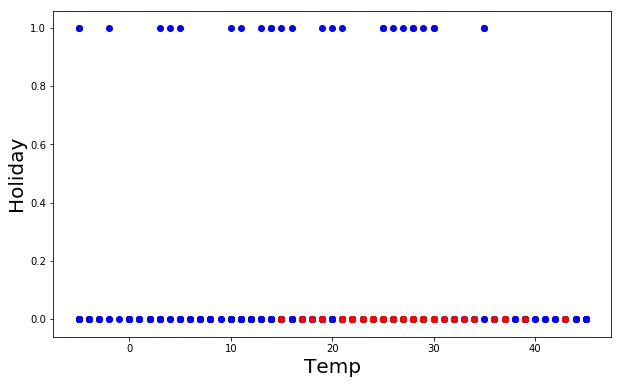

In [13]:
# seperate into over 100 and under 100

mask = bike['over100'] == 1

over, under = bike[mask], bike[~mask]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(under['temp'],under['holiday'], color='blue')
plt.scatter(over['temp'],over['holiday'], color='red')
plt.xlabel('Temp',fontsize=20)
plt.ylabel('Holiday',fontsize=20)
plt.show()

Notice how from 0 up to about 25 degrees, a higher temperature seems to lead to more rentals, yet after this point, a higher and higher temperature seems to lead to fewer rentals.

A straight line can't model this relationship, and therefore even the simplest of realities:

- When its too cold I don't want to bike
- When the temperature is nice I want to bike
- When its too hot I don't want to bike

...Can't be modelled by a linear model. And this is a realtively simply/straightforward cause-effect relationship.

Imagine how bad linear modelling is for much more sophisticated cause-effect realities like social policy decisions, stock prices, health care data and more!

Linear relationships have some advantages:

- Easy for humans to understand
- Easy to visualize on a chart
- Human minds tend to think in linear patterns

Because of this, often times in the real world data series will contain data in one column/axis/dimension that simply isn't meangingful to interpret in only one dimension.

For example, in our temperature data we captured a non-linear trend in a linear representation of data- a lot of this is due to the fact that human beings simply find this far more intuitive.

In order to model reality though, we need to go from linear -> non-linear. We've already seen cases in this class of manipulating dimensions of data, and that's just what we need to do here. We need to ADD dimensions to our data which will allow things to allow for more degrees of seperation in our data.

<img src="https://nlp.stanford.edu/IR-book/html/htmledition/img1331.png">

## 2.4 Kernel Trick

The so called 'kernel' trick is how SVM applies a linear fit to data that is originally non-linear. You can think of the kernel trick as various forms of 'layering a modification' onto existing data

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9ZlV7e2_N_u3wQPDqn_Wg1kMAcbogJ9eMwqpFjpXqtK92DdOuuw">

<img src="https://i.ytimg.com/vi/OmTu0fqUsQk/maxresdefault.jpg">

<img src="http://i2.wp.com/blog.hackerearth.com/wp-content/uploads/2017/02/kernel.png">

<img src="http://www.statsoft.com/textbook/graphics/SVMIntro3.gif">

<img src="https://i.stack.imgur.com/1gvce.png">


The 'kernel trick' allows us to use linear seperation on data which contains relationships which are more complicated then linear functions alone can express.


Q: How do we choose a kernel?  When to use which one?

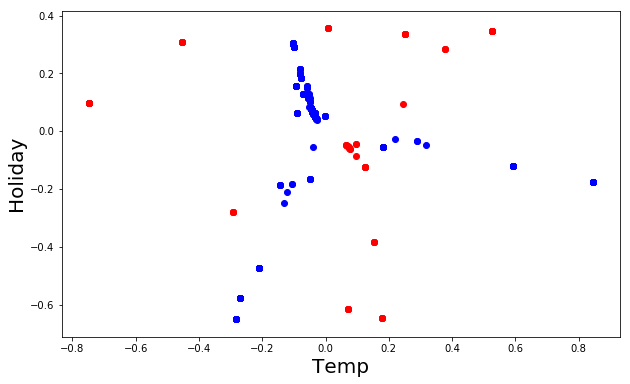

In [14]:
# This step is entirely unnecessary, repeat you do NOT need to do this manually to run SVM
# We are ONLY doing it here for demo purposes to visualize the manipulations made by the kernel trick

from sklearn.decomposition import KernelPCA

# Try playing around with rbf and poly kernels, maniuplating gamma (coefficient) and degree (degrees of polynomial)
# What seems to work best?
# Details here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#scikit_kpca = KernelPCA(kernel='sigmoid', gamma=1, degree=1)
scikit_kpca = KernelPCA(kernel='rbf', gamma=1, degree=1)

kernel_under = under[['temp','holiday']]
kernel_over = over[['temp','holiday']]

kernel_under = scikit_kpca.fit_transform(kernel_under)
kernel_over = scikit_kpca.fit_transform(kernel_over)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(kernel_under[:,0], kernel_under[:,1], color='blue')
plt.scatter(kernel_over[:,0], kernel_over[:,1], color='red')
plt.xlabel('Temp',fontsize=20)
plt.ylabel('Holiday',fontsize=20)
plt.show()

In [15]:
# Let's run analysis now trying different hyperparameters
# Remember we still have our data ready and formatted from before

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(243, 12)
(121, 12)
(243, 1)
(121, 1)


,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
295,0,7,0.822,0,0,0,0,1,0,1,0,0
73,0,25,0.520,0,0,0,1,0,0,1,0,0
152,0,39,0.587,0,1,0,0,0,0,0,1,0
3,0,26,0.305,0,0,0,1,0,0,1,0,0
288,0,-5,0.771,0,0,0,0,1,0,1,0,0


In [16]:
model = SVC(kernel='poly', degree=3)
svm_model = model.fit(X_train, Y_train)

svm_predictions = model.predict(X_test)

print(svm_model.score(X_test,Y_test))
print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svm_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.909090909091
[[92  0]
 [11 18]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94        92
          1       1.00      0.62      0.77        29

avg / total       0.92      0.91      0.90       121



We can further improve the accruacy of our models by tuning hyperparamers- there are no hard and fast rules when it comes to these, just what works better empirically!

That's why splitting training and testing data is so important!

## 3.0 Regression

## 3.1 Linear Regression

Let's recap using a straight line to predict rentals using multiple input variables

In [17]:
bike = pd.read_csv('bike_rentals.csv')
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity
0,109,Monday,Spring,0,21,0.500
1,45,Tuesday,Spring,1,25,0.414
2,63,Wednesday,Spring,0,15,0.352
3,105,Thursday,Spring,0,26,0.305
4,20,Friday,Spring,1,10,0.236


In [18]:
df_dummies = pd.get_dummies(bike,prefix = 'dum')

# Drop Fall and Monday since if its not any other season or day of week it must be fall/monday
# Could've dropped any given column from each, not necessarily only fall and monday
# This helps cut down on correlation between our columns
regression_data = df_dummies.drop(['dum_Fall','dum_Monday'],axis=1)
regression_data.head()

,rentals,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
0,109,0,21,0.500,0,0,0,0,0,0,1,0,0
1,45,1,25,0.414,0,0,0,0,1,0,1,0,0
2,63,0,15,0.352,0,0,0,0,0,1,1,0,0
3,105,0,26,0.305,0,0,0,1,0,0,1,0,0
4,20,1,10,0.236,1,0,0,0,0,0,1,0,0


In [19]:
X = regression_data.drop('rentals',axis=1)
Y = regression_data[['rentals']]

X.head()

,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
0,0,21,0.500,0,0,0,0,0,0,1,0,0
1,1,25,0.414,0,0,0,0,1,0,1,0,0
2,0,15,0.352,0,0,0,0,0,1,1,0,0
3,0,26,0.305,0,0,0,1,0,0,1,0,0
4,1,10,0.236,1,0,0,0,0,0,1,0,0


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()

(243, 12)
(121, 12)
(243, 1)
(121, 1)


,holiday,temp,humidity,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_Spring,dum_Summer,dum_Winter
284,0,6,0.750,1,0,0,0,0,0,1,0,0
281,0,3,0.752,0,0,0,0,1,0,1,0,0
156,0,41,0.434,0,0,0,0,0,1,0,1,0
12,0,19,0.319,0,1,0,0,0,0,1,0,0
71,0,23,0.545,0,0,0,0,1,0,1,0,0


In [21]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(X.columns.get_values())
lm2 = LinearRegression()

linmod = lm2.fit(X_train,Y_train)
print("Our intercept ", linmod.intercept_)
print("Our coefficient ", linmod.coef_)
print(mean_squared_error(Y_test,linmod.predict(X_test)))

['holiday' 'temp' 'humidity' 'dum_Friday' 'dum_Saturday' 'dum_Sunday'
 'dum_Thursday' 'dum_Tuesday' 'dum_Wednesday' 'dum_Spring' 'dum_Summer'
 'dum_Winter']
Our intercept  [ 87.18896678]
Our coefficient  [[ -18.2798166     1.78159024 -120.93841755   15.37311311   48.64011265
    50.66056684   -0.66819949   -0.13178544    1.8090152    -0.38685201
   -25.9152011    28.78016179]]
1060.45958343


## 3.2 Non-Linear Regression With Support Vector Machines (Support Vector Regression)

<img src="http://kernelsvm.tripod.com/index_files/image002.gif">

<img src="http://kernelsvm.tripod.com/index_files/image004.gif">

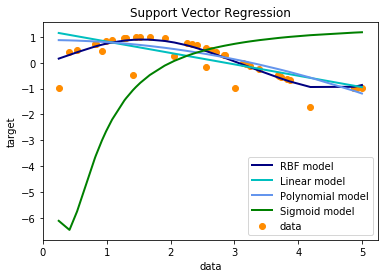

In [22]:
# THIS CELL IS ONLY FOR SAKE OF EXAMPLE
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Using numpy to quickly create arrays of randomly distributed data for X, then manipulating it for Y
# Again, this is totally for the sake of example, just generating simple 'junk' data 
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add some randomless to y elements so that X doesn't perfectly predict it
y[::5] += 3 * (0.5 - np.random.rand(8))


# Run multiple types of Support Vector Regressions at Once
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=2)
svr_sigmoid = SVR(kernel='sigmoid', degree=5)
svr_precomputed = SVR(kernel='precomputedDNLM')
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
y_sigmoid = svr_sigmoid.fit(X, y).predict(X)
#y_precomputed = svr_precomputed.fix(X, y).predict(X)

# Analyze results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(X, y_sigmoid, color='green', lw=lw, label='Sigmoid model')
#plt.plot(X, y_precomputed, color='purple', lw=lw, label='Precomputed model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [23]:
from sklearn import svm

model = svm.SVR(kernel='poly', degree=3)

model.fit(X_train,Y_train)

# Check how our SVR model did at predictions
print(mean_squared_error(Y_test,model.predict(X_test)))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2661.39634065


## 4.0 Naive Bayes Classifier

Imagine you are working on a classification problem. You have a bunch of features (or columns) related to the problem, and you want to predict which class every row falls in. 

e.g. you have a bunch of data about every person who has applied for a loan, such as their credit rating, amount requested, annual income etc, and you want to predict whether the person is safe to lend to or not. This is what a classification problem is, where you use the information about every applicant in this case, to classify whether they will pay back or not. This is also where Naive Bayes comes in.

To explain what a Naive Bayes Classifier does, we need to recap some Maths, more specifically, bayesian probabilities. Some of you have seen the following syntax: P(X|Y). 

For those who have not, this denotes the probability of X, given Y has already occured. 
e.g. What is the probability of it raining if there are black clouds in the sky?

This can only be applied to dependent probabilities, i.e., where the Y and X are actually related. 

If someone asked you: what is the probability that you will flip a heads, given that in your last toss you flipped a tail? You know that they are unrelated! Bayesian proabilities cannot be applied there. 

### High Level

To understand even relatively high-level mechanics of how Naive Bayes works, we'd need to spend about a week recaping Bayes' Theorem, so I won't go  into that, but on a very simple level, it takes features of a dataset and predicts which class each row falls into. Naive Bayes is a very fast and powerful algorithm when it comes to classification, and is especially good with predicting unseen data as we will see. 

### Assumptions

**Naive Bayes is called 'naive' because it makes the assumption that all your features are independent of each other.** 

Simply put, that means that it assumes that your Xs are not related to each other in any way. This is why it's called naive, because that's pretty much never the case in real life. 

As an example with the housing dataset from last week, this would imply that our variables 'sq_feet' and 'quality' are completely unrelated. We can be pretty sure that square footage had some semblance of effect on quality.

Does this make NBC very naive? Yes.
Still works wonderfully because it's that powerful. 


### Data Types

The best thing about NBC is that it is data type agnostic. It will work fine with continuous, categorical and boolen variables without a problem. This saves us a lot of time on cleaning, and only leaves us categorization and normalisation of our features to perform.

### Pros and Cons

**Pros**

1. Fast and easy to perform
2. Performs better than logistic regressions given independence assumption is 'decently' satisfied
3. Data Type Agnostic

**Cons**

1. Good classifier, very bad estimator - not good for predicting probability of it falling in any class
2. The Naive part can be its downfall

### Use-Cases

1. Classification Problems - extremely powerful
2. Recommendation systems of any types
3. Natural Language Processing

We're going to be using the US Census data, that has quite a few features on people in the US such as their industry, education level, weekly hours worked etc. This will be our X. We will be predicting which income bracket they fall into, i.e., <=50K or >50k. 

Most of the steps here should be very similar to you since they're all things we've done or discussed before. 

Check here for information on columns:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names


In [24]:
import pandas as pd
import numpy as np

# Since this is a different kind of file (text), we have to use read_table instead of read_csv

cc = pd.read_table('adult.data.txt', sep = ',', header=None)

cc.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
              'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',
              'income_bracket']
cc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

# We have a lot of text columns we can't use. We're going to turn them into categorical one by one

cc['workclass_cat'] = lb_make.fit_transform(cc['workclass'])
cc['marital-status_cat'] = lb_make.fit_transform(cc['marital-status'])
cc['occupation_cat'] = lb_make.fit_transform(cc['workclass'])
cc['occupation_cat'] = lb_make.fit_transform(cc['occupation'])
cc['relationship_cat'] = lb_make.fit_transform(cc['relationship'])
cc['race_cat'] = lb_make.fit_transform(cc['race'])
cc['native-country_cat'] = lb_make.fit_transform(cc['native-country'])
cc['sex_cat'] = lb_make.fit_transform(cc['sex'])
cc['income_bracket_cat'] = lb_make.fit_transform(cc['income_bracket'])
cc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country,income_bracket,workclass_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,native-country_cat,sex_cat,income_bracket_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,4,1,1,4,39,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,2,4,0,4,39,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,0,6,1,4,39,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,2,6,0,2,39,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,2,10,5,2,5,0,0


In [26]:
# Dropping the original text columns

cat = cc.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex',
                    'native-country','income_bracket'], axis =1)
cat.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,native-country_cat,sex_cat,income_bracket_cat
0,39,13,2174,0,40,7,4,1,1,4,39,1,0
1,50,13,0,0,13,6,2,4,0,4,39,1,0
2,38,9,0,0,40,4,0,6,1,4,39,1,0
3,53,7,0,0,40,4,2,6,0,2,39,1,0
4,28,13,0,0,40,4,2,10,5,2,5,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Some of you were asking how to do feature scaling using Sklearn last time
# We can use the processing sub-module which has a MinMaxScaler function (same as feature scaling)


min_max_scaler = MinMaxScaler()
cat['age'] = min_max_scaler.fit_transform(cat['age'])
cat['education-num'] = min_max_scaler.fit_transform(cat['education-num'])
cat['capital-gain'] = min_max_scaler.fit_transform(cat['capital-gain'])
cat['capital-loss'] = min_max_scaler.fit_transform(cat['capital-loss'])
cat['hours-per-week'] = min_max_scaler.fit_transform(cat['hours-per-week'])

cat.head()

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\devtool\app\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\devtool\app\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\devtool\app\Anaconda3\lib\site-packages\s

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,native-country_cat,sex_cat,income_bracket_cat
0,0.301370,0.800000,0.02174,0.0,0.397959,7,4,1,1,4,39,1,0
1,0.452055,0.800000,0.00000,0.0,0.122449,6,2,4,0,4,39,1,0
2,0.287671,0.533333,0.00000,0.0,0.397959,4,0,6,1,4,39,1,0
3,0.493151,0.400000,0.00000,0.0,0.397959,4,2,6,0,2,39,1,0
4,0.150685,0.800000,0.00000,0.0,0.397959,4,2,10,5,2,5,0,0


In [28]:
X = cat.drop('income_bracket_cat', axis = 1) # Taking everything but our Y
Y = cat[['income_bracket_cat']] # Taking only our X

In [29]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33,  random_state = 2)

**Time for some more Maths!**

Within Naive Bayes, there are numerous subtype models you can use. We are going to be using the simplest and most highly applicable one to all datatypes: Gaussian. This assumes that our continous features are normally distributed. Another naive assumption, but works well.

There are two other main ones, Bernoulli & Multinomial that we will breifly talk about later.

In [30]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [31]:
train_preds = model.predict(X_train)
model.score(Y_train,train_preds)

0.80490488196195276

In [32]:
test_preds = model.predict(X_test)
model.score(Y_test,test_preds)

0.79620323841429375

### Multinomial & Bernoulli

**Multinomial:** This is used for discrete counts, such as how many times something occurs. An example with this dataset could be a feature such as number-of-jobs which would record how many times they've switched jobs.

**Bernoulli:** Works with dichotomous variables (True/False, 1/0). Gender is one example from our dataset above. 

### How can we improve the model?

Although NBC is easy to implement, it can be very challenging to tweak to improve accuracy. Some steps we could take (outside the scope of this class):

- Remove correlated features
- Transform all continuous variables to normal distribution
- Ensemble Modelling

## 5.0 In Class Activity - Classify at Risk Employees

Use either SVM or Naive Bayes to correctly classify at risk employees.

In [33]:
import pandas as pd

hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
# CLEAN DATA

# Here add any cleaning or conversion of columns you want to do

# For now we will drop non-quantified columns
hr = hr.drop(['sales','salary'], axis=1)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [35]:
# SPLIT DATA INTO X and Y
# We are trying to predict Y, using everything else
X = hr.drop('left', axis = 1)
Y = hr[['left']]
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [36]:
# DIVIDE INTO TRAINING AND TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()

(10049, 7)
(4950, 7)
(10049, 1)
(4950, 1)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
10850,0.97,0.89,4,248,2,0,0
7821,0.42,0.41,5,240,2,0,0
9167,0.26,0.47,3,241,4,0,0
12885,0.72,0.79,3,221,3,0,0
8641,0.54,0.65,5,206,4,1,0


In [37]:
# Now we are ready for analysis, here is an example with simple logistic regression. See if you can beat the results!
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit = LogisticRegression()
logistic_model = logit.fit(X_train,Y_train)
logistic_predictions = logistic_model.predict(X_test)

print("Logistic model's accuracy is: ", logistic_model.score(X_test,Y_test))
print(metrics.classification_report(Y_test, logistic_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic model's accuracy is:  0.757575757576
             precision    recall  f1-score   support

          0       0.79      0.92      0.85      3748
          1       0.50      0.25      0.33      1202

avg / total       0.72      0.76      0.73      4950



In [38]:
# Importing both ML techniques so you can decide which to use
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [39]:
svc = SVC(kernel='poly', degree=1)
svc_model = svc.fit(X_train, Y_train)
svc_predictions = svc.predict(X_test)

#print('DNLM')

print("Support Vector Classification accuracy (Poly) is: ", svc_model.score(X_test,Y_test))
#print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svc_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classification accuracy (Poly) is:  0.757171717172
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      3748
          1       0.00      0.00      0.00      1202

avg / total       0.57      0.76      0.65      4950



C:\devtool\app\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
svc = SVC(kernel='rbf')
svc_model = svc.fit(X_train, Y_train)
svc_predictions = svc.predict(X_test)

#print('DNLM')

print("Support Vector Classification (RBF) accuracy is: ", svc_model.score(X_test,Y_test))
#print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svc_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classification (RBF) accuracy is:  0.956565656566
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3748
          1       0.90      0.93      0.91      1202

avg / total       0.96      0.96      0.96      4950



In [41]:
svc = SVC(kernel='sigmoid', degree=1)
svc_model = svc.fit(X_train, Y_train)
svc_predictions = svc.predict(X_test)

#print('DNLM')

print("Support Vector Classification accuracy (Sigmoid) is: ", svc_model.score(X_test,Y_test))
#print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svc_predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classification accuracy (Sigmoid) is:  0.757171717172
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      3748
          1       0.00      0.00      0.00      1202

avg / total       0.57      0.76      0.65      4950



C:\devtool\app\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_jobs = 30)
clf_model = clf.fit(X_train, Y_train)
clf_predictions = clf.predict(X_test)

print("Support Vector Classification accuracy (RFC) is: ", clf_model.score(X_test,Y_test))
#print(metrics.confusion_matrix(Y_test, svm_predictions))
print(metrics.classification_report(Y_test, svc_predictions))


C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Support Vector Classification accuracy (RFC) is:  0.985656565657
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      3748
          1       0.00      0.00      0.00      1202

avg / total       0.57      0.76      0.65      4950



C:\devtool\app\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
